Set to autoload modules and to load charts inline.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Import all necessary fastai components.

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy, error_rate

Make randoms deterministic.

In [0]:
np.random.seed(170081)

Define content paths to save progress.

In [0]:
content_dir = "/content"
url_file_name = "https://datasets.simula.no/kvasir/data/kvasir-dataset-v2.zip"
zip_file_name = f"/{content_dir}/kvasir-dataset-v2.zip"
dataset_dir = f"{content_dir}/kvasir-dataset-v2"

Download the dataset files to the content directory. (Skip if already exsists)

In [5]:
!wget -nc {str(url_file_name)} {str(zip_file_name)}

File ‘kvasir-dataset-v2.zip’ already there; not retrieving.

//content/kvasir-dataset-v2.zip: Scheme missing.


Extract the files. (Skip if already exsists)

In [0]:
!unzip -n -q {str(zip_file_name)} -d {str(content_dir)}

Get dataset path as a posix path.

In [7]:
path = pathlib.Path(dataset_dir)
path

PosixPath('/content/kvasir-dataset-v2')

List images to know if all have loaded successfully.

In [8]:
fnames = get_image_files(path, recurse=True)
fnames[:10]

[PosixPath('/content/kvasir-dataset-v2/polyps/b3a01269-1dc6-43a0-9d5e-1861db87d8be.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/68df64f0-9afc-4ca0-87a6-e02a0559ee9f.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/bb00921c-0284-4d9a-9e2a-841cff21112a.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/65e210a5-a594-4545-9c9b-021ad425573d.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/8e85ed77-b982-4689-a41c-dce2708766eb.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/c7246fd5-2e6a-47ae-821a-217f43b674a6.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/8c4c719c-64e2-42c8-88e9-d6a7e1efe5cc.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/2dfa5106-afb6-4b0e-8e15-df9edd3a4847.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/d26283f0-1443-4ca7-85a8-facb7fafab6b.jpg'),
 PosixPath('/content/kvasir-dataset-v2/polyps/20db5a9d-b150-41c3-b03d-4f65b5101132.jpg')]

Create image data bunch from the directory.

In [9]:
doc(ImageDataBunch.from_folder)

In [0]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, size=224, ds_tfms=get_transforms(), bs=32)

Normalize all images according to imagenet stat.

In [11]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (6400 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
polyps,polyps,polyps,polyps,polyps
Path: /content/kvasir-dataset-v2;

Valid: LabelList (1600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
normal-cecum,dyed-lifted-polyps,dyed-resection-margins,dyed-lifted-polyps,dyed-lifted-polyps
Path: /content/kvasir-dataset-v2;

Test: None

Show sample images.

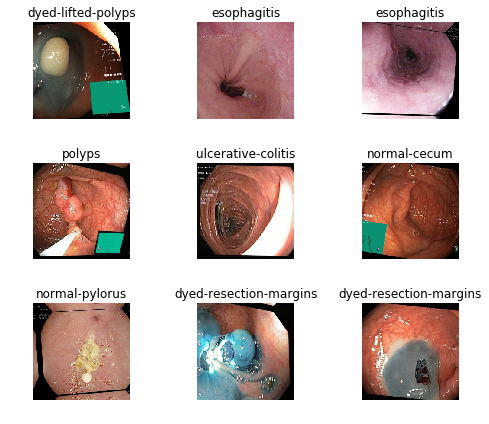

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
data.classes

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate], callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.729149,0.404569,0.837500,0.162500,04:38
1,0.509189,0.333062,0.864375,0.135625,04:41
2,0.406479,0.294342,0.876250,0.123750,05:07
3,0.347685,0.271705,0.880000,0.120000,04:51
4,0.312236,0.262733,0.889375,0.110625,04:44


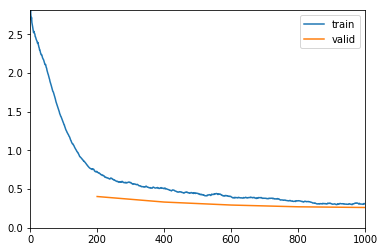

In [15]:
learn.fit_one_cycle(5)

In [0]:
learn.save("kvasir-resnet34-32bs-7ep-88acc")

In [0]:
intepretation = ClassificationInterpretation.from_learner(learn)

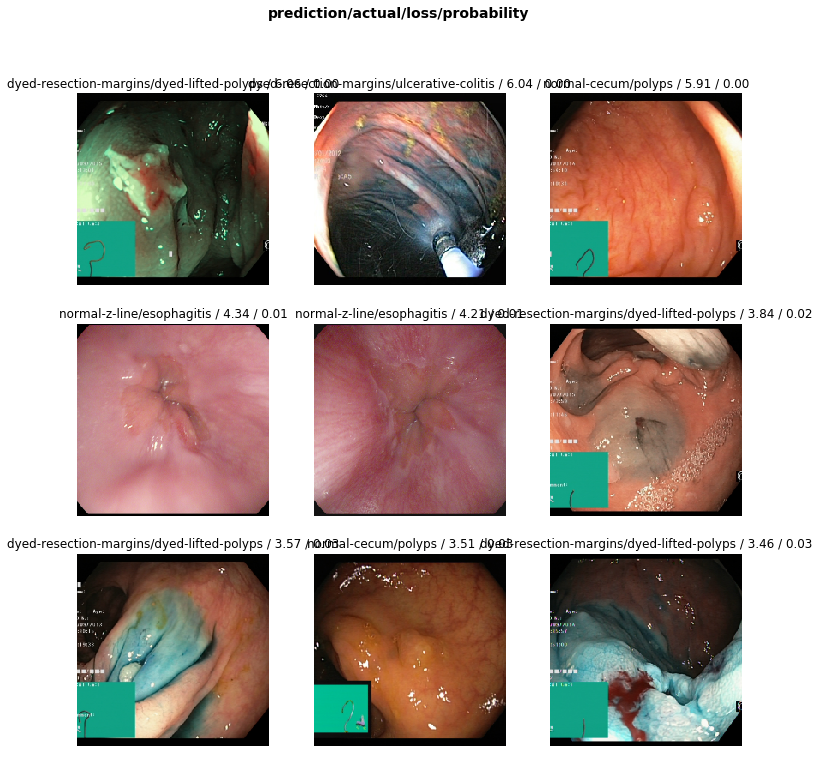

In [18]:
intepretation.plot_top_losses(9)

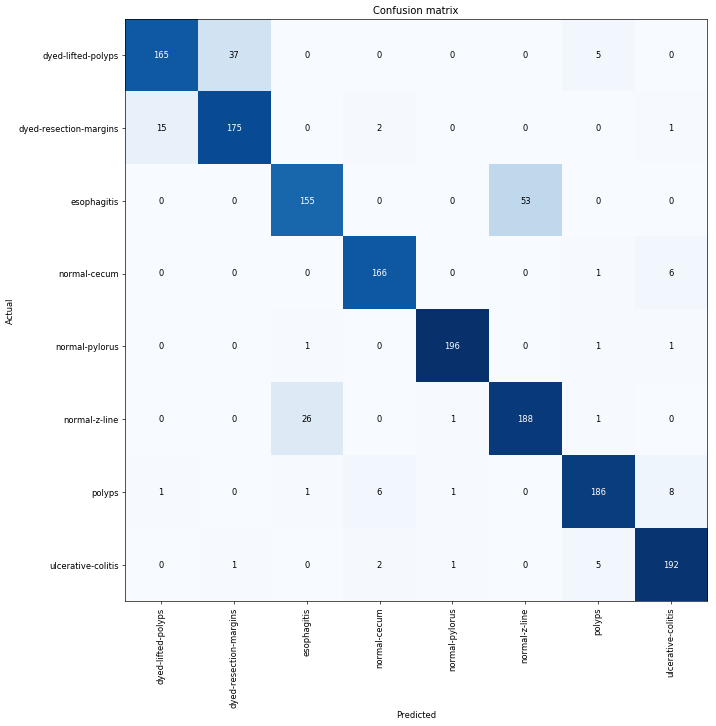

In [19]:
intepretation.plot_confusion_matrix(dpi=60, figsize=(12,12))

In [20]:
intepretation.most_confused(2)

[('esophagitis', 'normal-z-line', 53),
 ('dyed-lifted-polyps', 'dyed-resection-margins', 37),
 ('normal-z-line', 'esophagitis', 26),
 ('dyed-resection-margins', 'dyed-lifted-polyps', 15),
 ('polyps', 'ulcerative-colitis', 8),
 ('normal-cecum', 'ulcerative-colitis', 6),
 ('polyps', 'normal-cecum', 6),
 ('dyed-lifted-polyps', 'polyps', 5),
 ('ulcerative-colitis', 'polyps', 5),
 ('dyed-resection-margins', 'normal-cecum', 2),
 ('ulcerative-colitis', 'normal-cecum', 2)]

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


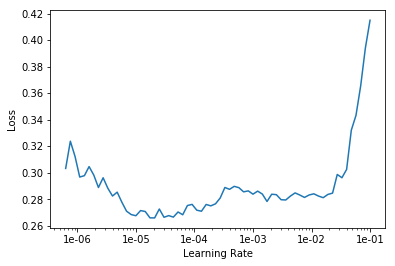

In [22]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.315257,0.258860,0.893750,0.106250,04:49
1,0.310145,0.253186,0.891250,0.108750,04:49
2,0.283231,0.252538,0.894375,0.105625,04:45


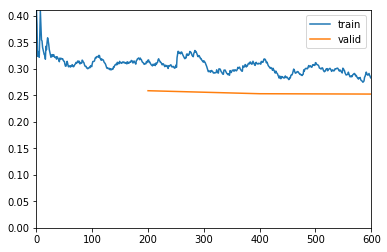

In [24]:
learn.fit_one_cycle(3, 1e-6)

In [0]:
learn.freeze()

In [0]:
learn.save("kvasir-resnet34-32bs-89acc-ft")